<a href="https://colab.research.google.com/github/anyelyra/TaskWeek4/blob/main/TaskWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Anyelyra Kantata

NPM: 2206048625

In [1]:
!pip install d2l==1.0.3

In [32]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

# 8.1. Deep Convolutional Neural Networks (AlexNet)

## 8.1.2. AlexNet

### 8.1.2.3. Capacity Control and Preprocessing|

In [1]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

NameError: name 'd2l' is not defined

In [43]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

### 8.1.3. Training

In [ ]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

## 8.1.5. Exercises

1. Following up on the discussion above, analyze the computational properties of AlexNet.

> 1. Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?

In [ ]:
model = Alexnet()
X = torch.randn(1,3, 224, 224)
_ = model(X)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(model.net):
    if type(module) not in (nn.Linear,nn.Conv2d):
        continue
    num = sum(p.numel() for p in module.parameters())
    # print(f"Module {idx + 1}: {num} parameters type:{type(module)}")
    if type(module) == nn.Conv2d:
        params['conv'] += num

    else:
        params['lr'] += num

params

> 2. Calculate the computational cost for the convolutions and the fully connected layers.

In [ ]:
x = torch.randn(1,3, 224, 224)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(model.net):
    c_i = x.shape[1]
    x = module(x)
    if type(module) == nn.Conv2d:
        k = [p.shape for p in module.parameters()]
        c_o,h_o,w_o = x.shape[1], x.shape[2], x.shape[3]
        params['conv'] += c_i*c_o*h_o*w_o*k[0][-1]*k[0][-2]
    if type(module) == nn.Linear:
        params['lr'] += sum(p.numel() for p in module.parameters())
params

In [ ]:
X = torch.randn(1,3, 224, 224)
_ = model(X)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

> 3. How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?

Bandwidth baca dan tulis, latency, dan ukuran mesangat mempengaruhi komputasi dalam pelatihan dan inferensi neural network.

* Bandwidth yang tinggi memungkinkan perpindahan data lebih cepat antara memori dan unit pemrosesan, bandwith yang tinggi juga mempercepat pelatihan dan inferensi karena mengurangi waktu menunggu data.

* Latency rendah mempercepat akses data dan komputasi. Pada training, latency rendah penting untuk pembaruan bobot dan gradien, sementara dalam inferensi penting untuk memastikan respon yang cepat, terutama di aplikasi yang real time.

* Ukuran memori yang besar memungkinkan penyimpanan data lebih banyak. Dalam pelatihan, ini membantu menampung gradien dan parameter model, sedangkan dalam inferensi memori yang cukup membantu menyimpan hasil perantara.

2. You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?

* Menentukan tujuan kerja
* Menganalisis pola akses memori dan komputasi.
* Seimbangkan unit komputasi dan memori dengan menyesuaikan jumlah inti, ukuran cache, dan hirarki memori.
* Buat hirarki memori yang efisien untuk mengurangi bottleneck.
* Tingkatkan bandwidth memori dan gunakan paralelisme untuk meningkatkan efisiensi.
* Evaluasi dan sesuaikan desain berdasarkan hasil simulasi dan umpan balik.

3. Why do engineers no longer report performance benchmarks on AlexNet?

* Tidak lagi mencerminkan efisiensi dan akurasi model terkini.
* Model modern seperti VGG, ResNet, dan model berbasis Transformer telah lebih populer dan efisien.
* Engineer ;ebih memilih model yang disesuaikan untuk tugas tertentu, seperti EfficientNet untuk klasifikasi gambar.
* Kinerja dalam aplikasi nyata lebih diutamakan, seperti analisis citra medis dan pemahaman bahasa alami.

4. Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why?

AlexNet menunjukkan peningkatan akurasi dan ketahanan dalam mengklasifikasikan pola yang kompleks karena arsitekturnya yang lebih dalam dan jumlah parameter yang lebih besar, yang memungkinkannya untuk mempelajari fitur-fitur yang lebih rumit dari dataset.

Sedangkan, LeNet mungkin menunjukkan sedikit peningkatan dengan bertambahnya epoch, arsitektur yang lebih sederhana membatasi kemampuannya untuk menangkap tingkat detail yang sama seperti AlexNet.

Sehingga, AlexNet lebih efektif untuk dataset yang lebih besar dan tugas yang lebih menantang, sehingga menghasilkan kinerja yang lebih baik seiring dengan peningkatan jumlah epoch pelatihan.

Perilaku ini disebabkan kemampuan jaringan yang lebih dalam untuk memanfaatkan data dengan lebih efektif, sehingga meningkatkan kemampuan generalisasi sambil meminimalkan risiko overfitting.

5. AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.

> 1. Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.

Langakah-langkah:
1. Mengurangi jumlah layer, ukuran filter, dan dimensi input
2. Menggunakan pengaturan training yang berbeda
3. Menggunakan regularization
4. Menggunakan data augmentation

> 2. Design a better model that works directly on 28 x 28
 images

In [ ]:
class SimplifiedSmallAlexnet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(128, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Mengurangi dimensi lebih awal
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Mengurangi dimensi lebih awal
            nn.Flatten(),
            nn.LazyLinear(256),  # Mengurangi jumlah neuron
            nn.LazyLinear(num_classes)
        )

6. Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.

Memodifikasi ukuran batch dapat memberikan dampak yang signifikan terhadap throughput (jumlah gambar yang diproses per detik), akurasi, dan penggunaan memori GPU. Namun, ukuran batch yang terlalu besar dapat menyebabkan penggunaan memori GPU yang lebih tinggi, berpotensi menyebabkan out-of-memory error, terutama pada arsitektur jaringan yang lebih dalam seperti AlexNet.

Sebaliknya, mengurangi ukuran batch dapat menurunkan throughput tetapi mungkin meningkatkan akurasi, terutama jika ukuran batch yang kecil memungkinkan model untuk belajar dari variasi data yang lebih baik dan mengurangi risiko overfitting. P

engaruh ukuran batch juga tergantung pada arsitektur model dan karakteristik dataset yang digunakan; oleh karena itu, eksperimen lebih lanjut diperlukan untuk menemukan ukuran batch yang optimal yang seimbang antara throughput dan akurasi sambil mempertimbangkan keterbatasan memori GPU.

7. Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?

In [ ]:
class LeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(6, kernel_size=5, padding=2),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.LazyConv2d(16, kernel_size=5),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.Flatten(),
                                 nn.LazyLinear(120),
                                 nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(84),
                                 nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(num_classes))
model = LeNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

8. Can you make AlexNet overfit? Which feature do you need to remove or change to break training?

* Mengurangi ukuran dataset pelatihan.
* Meningkatkan kompleksitas model dengan menambah lapisan dan parameter.
* Menghilangkan teknik regulasi.
* Menggunakan tingkat training yang rendah dan jumlah epoch yang terbatas.
* Memberikan label yang bersih tanpa noise.

# 8.2. Networks Using Blocks (VGG)

## 8.2.1. VGG Blocks

In [ ]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

## 8.2.2. VGG Network

In [ ]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

## 8.2.3. Training

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.2.5. Exercises

1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory.

> 1. Compare the number of parameters needed for AlexNet and VGG.

In [ ]:
arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
vgg = VGG(arch=arch)
X = torch.randn(1,3, 224, 224)
_ = vgg(X)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(vgg.net):
    if type(module) == nn.Sequential:
        stat_params(module,params)
    if type(module) == nn.Linear:
        num = sum(p.numel() for p in module.parameters())
        params['lr'] += num
params

> 2. Compare the number of floating point operations used in the convolutional layers and in the fully connected layers.

In [ ]:
x = torch.randn(1,3, 224, 224)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(vgg.net):
    if type(module) == nn.Sequential:
        x = stat_comp(module, params, x)
    if type(module) == nn.Linear:
        params['lr'] += sum(p.numel() for p in module.parameters())
params

In [ ]:
X = torch.randn(1,3, 224, 224)
_ = vgg(X)
total_params = sum(p.numel() for p in vgg.parameters())
print("Total parameters:", total_params)

> 3. How could you reduce the computational cost created by the fully connected layers?


Global Average Pooling (GAP), lapisan konvolusional 1x1, pruning jaringan, aproksimasi Low-Rank, atau kuantisasi.

2. When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?

In [ ]:
vgg

Blok konvolusi dianggap sebagai satu lapisan dalam jaringan, dan tiga blok konvolusi terakhir dalam VGG masing-masing terdiri dari dua lapisan konvolusi, sehingga menjadi tiga lapisan yang tersisa

3. Use Table 1 in the VGG paper (Simonyan and Zisserman, 2014) to construct other common models, such as VGG-16 or VGG-19.|

In [ ]:
arch16=((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))
vgg16 = VGG(arch=arch16)
vgg16

In [ ]:
arch19=((2, 64), (2, 128), (4, 256), (4, 512), (4, 512))
vgg19 = VGG(arch=arch19)
vgg19

4. Upsampling the resolution in Fashion-MNIST eight-fold from 28x28 to 224 x 224 dimensions is very wasteful. Try modifying the network architecture and resolution conversion, e.g., to 56 or to 84 dimensions for its input instead. Can you do so without reducing the accuracy of the network? Consult the VGG paper (Simonyan and Zisserman, 2014) for ideas on adding more nonlinearities prior to downsampling.

In [ ]:
model = VGG(arch=((3, 128), (3, 256)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28))
trainer.fit(model, data)

# 8.3. Network in Network (NiN)

## 8.3.1. NiN Blocks

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

## 8.3.2. NiN Model

In [ ]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [ ]:
NiN().layer_summary((1, 1, 224, 224))

## 8.3.3. Training

In [ ]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.3.5. Exercises

1. Why are there two 1x1 convolutional layers per NiN block? Increase their number to three. Reduce their number to one. What changes?

Dalam arsitektur Network in Network (NiN), lapisan konvolusi 1x1 digunakan untuk memperkenalkan non-linearitas tambahan dan meningkatkan kapasitas jaringan tanpa menambah terlalu banyak parameter. Penggunaan konvolusi 1x1 ini memiliki efek spesifik pada ekspresivitas dan kompleksitas jaringan:

* Dua Lapisan Konvolusi 1x1 per Blok NiN:memungkinkan banyak jalur untuk transformasi fitur.

* Tiga Lapisan Konvolusi 1x1 per Blok NiN: menambah kapasitas jaringan lebih jauh.

* Satu Lapisan Konvolusi 1x1 per Blok NiN: mengurangi kompleksitas setiap blok NiN, membatasi kapasitas jaringan untuk menangkap interaksi fitur kompleks.

In [ ]:
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
arch = ((96,11,4,0,[[1,0]]),(256,5,1,2,[[1,0]]),(384,3,1,1,[[1,0]]),(10,3,1,1,[[1,0]]))
model = Nin(arch, lr=0.05)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

2. What changes if you replace the 1x1 convolutions by 3x3 convolutions?

In [ ]:
arch = ((96,11,4,0,[[3,1],[3,1]]),(256,5,1,2,[[3,1],[3,1]]),(384,3,1,1,[[3,1],[3,1]]),(10,3,1,1,[[3,1],[3,1]]))
model = Nin(arch)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

3. What happens if you replace the global average pooling by a fully connected layer (speed, accuracy, number of parameters)?

In [ ]:
class MLPNin(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        layers = []
        for i in range(len(arch)-1):
            layers.append(nin_block(*arch[i]))
            layers.append(nn.MaxPool2d(3, stride=2))
        layers.append(nn.Dropout(0.5))
        layers.append(nin_block(*arch[-1]))
        layers.append(nn.Flatten())
        layers.append(nn.LazyLinear(num_classes))
        self.net = nn.Sequential(*layers)
        self.net.apply(d2l.init_cnn)

4. Calculate the resource usage for NiN.

> 1. What is the number of parameters?

In [ ]:
import torch
from torch import nn

# Define a NiN block
def nin_block(out_channels, kernel_size, strides, padding, conv1s=[(1, 0), (1, 0)]):
    layers = [nn.LazyConv2d(out_channels, kernel_size=kernel_size, stride=strides, padding=padding), nn.ReLU()]
    for conv1_size, conv1_padding in conv1s:
        layers.append(nn.LazyConv2d(out_channels, kernel_size=conv1_size, padding=conv1_padding))
        layers.append(nn.ReLU())
    return nn.Sequential(*layers)

# Define the NiN architecture using nin_block
class Nin(nn.Module):
    def __init__(self, arch):
        super(Nin, self).__init__()
        self.net = nn.Sequential()
        for i, (out_channels, kernel_size, strides, padding, num_conv1) in enumerate(arch):
            conv1s = [(1, 0) for _ in range(num_conv1)]  # Creating a list of (kernel_size, padding) for conv1
            self.net.add_module(f"block_{i}", nin_block(out_channels, kernel_size, strides, padding, conv1s))

    def forward(self, x):
        return self.net(x)

# Model definition and summary
arch = ((96, 11, 4, 0, 2), (256, 5, 1, 2, 2), (384, 3, 1, 1, 2), (10, 3, 1, 1, 2))
model = Nin(arch)

# Dummy input and parameter calculation
X = torch.randn(1, 3, 224, 224)
_ = model(X)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

> 2. What is the amount of computation?

In [ ]:
# Install the required package
!pip install thop

# Import the profile function from thop and calculate FLOPs and parameters
from thop import profile

# Calculate FLOPs and parameters for the model
flops, params = profile(model, inputs=(X,))
print("Total FLOPs:", flops)
print("Total parameters:", params)

> 3. What is the amount of memory needed during training?

In [ ]:
import torch
from d2l import torch as d2l

class Nin(d2l.Classifier):
    def __init__(self, arch, lr=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential()
        for i, (out_channels, kernel_size, strides, padding, num_conv1) in enumerate(arch):
            conv1s = [(1, 0) for _ in range(num_conv1)]  # Creating a list of (kernel_size, padding) for conv1
            self.net.add_module(f"block_{i}", nin_block(out_channels, kernel_size, strides, padding, conv1s))

    def forward(self, x):
        return self.net(x)

> 4. What is the amount of memory needed during prediction?

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
_ = model(X)
memory_stats = torch.cuda.memory_stats(device=device)
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

5. What are possible problems with reducing the 384 x 5 x 5 representation to a 10 x 5 x 5 representation in one step?

* Kehilangan Informasi
* Underfitting
* Penyempitan Informasi
* Pengurangan Ekspresivitas
* Fitur Spasial
* Kehilangan Daya Diskriminatif

6. Use the structural design decisions in VGG that led to VGG-11, VGG-16, and VGG-19 to design a family of NiN-like networks.

In [ ]:
arch = ((96,11,4,0,2),(256,5,1,2,2),(384,3,1,1,2),(10,3,1,1,2))
nin = Nin(arch)
nin

In [ ]:
class Nin(d2l.Classifier):
    def __init__(self, arch, lr=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential()
        for i, (out_channels, kernel_size, strides, padding) in enumerate(arch):
            # Only include a basic convolutional layer without additional 1x1 convolutions
            self.net.add_module(f"block_{i}", nin_block(out_channels, kernel_size, strides, padding))

    def forward(self, x):
        return self.net(x)

def nin_block(out_channels, kernel_size, strides, padding):
    layers = [
        nn.LazyConv2d(out_channels, kernel_size=kernel_size, stride=strides, padding=padding),
        nn.ReLU()
    ]
    return nn.Sequential(*layers)

arch15 = ((64, 3, 2, 1),
          (256, 3, 1, 1),
          (256, 3, 1, 1),
          (384, 3, 1, 1),
          (10, 3, 1, 1))

nin15 = Nin(arch15)
print(nin15)

# 8.4. Multi-Branch Networks (GoogLeNet)

## 8.4.1. Inception Blocks

In [ ]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

## 8.4.2. GoogLeNet Model

In [ ]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [ ]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [ ]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

## 8.4.3. Training

In [ ]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

# 8.5. Batch Normalization

## 8.5.3. Implementation from Scratch

In [ ]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [ ]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

## 8.5.4. LeNet with Batch Normalization

In [ ]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

## 8.5.5. Concise Implementation

In [ ]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

# 8.6. Residual Networks (ResNet) and ResNeXt

## 8.6.2. Residual Blocks

In [ ]:
class Residual(nn.Module):
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

In [ ]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

## 8.6.3. ResNet Model

In [ ]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

## 8.6.4. Training

In [ ]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.6.5. ResNeXt

In [ ]:
class ResNeXtBlock(nn.Module):
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [ ]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

# 8.7. Densely Connected Networks (DenseNet)

## 8.7.2. Dense Blocks

In [ ]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [ ]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

## 8.7.3. Transition Layers

In [ ]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [ ]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

## 8.7.4. DenseNet Model

In [ ]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

## 8.7.5. Training

In [ ]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## 8.7.7. Exercises

1. Why do we use average pooling rather than max-pooling in the transition layer?

*  ***Feature Map* yang lebih halus**:

*Average pooling* menghitung nilai rata-rata dari
elemen-elemen di *pooling window*, sehingga menghasilkan *feature map* yang lebih halus dan umum, juga kurang sensitif terhadap noise atau pola spesifik dibandingkan *max pooling*. Pada *transition layer*, hal ini membantu mencegah model dari overfitting pada detail kecil di *layer* awal dan lebih fokus pada struktur keseluruhan input.

*  **Mempertahankan informasi dengan lebih baik**:

*Max pooling* hanya menyimpan fitur yang paling dominan di setiap area, yang dapat menyebabkan hilangnya informasi penting. Sedangkan, *Average pooling* menangkap distribusi fitur yang lebih luas, yang bisa menghasilkan representasi yang lebih baik.

*  ***Gradient Flow***:

Dalam beberapa arsitektur, seperti DenseNet, *average pooling* lebih sering dipakai di *transition layer* karena memungkinkan *gradient flow* yang lebih baik selama *backpropagation*. Sifat *average pooling* yang lebih seimbang (dibandingkan *max pooling*) memastikan *gradien* cenderung tidak menghilang, sehingga pelatihan menjadi lebih stabil.

*  **Reduksi Dimensi**:

Baik *max pooling* maupun *average pooling*, keduanya dimensi spasial dari *feature map*, tetapi *average pooling* melakukannya dengan cara lebih menjaga pola-pola halus dalam gambar, yang dapat berguna dalam mempertahankan integritas data saat melewati *transition layer*.

2. One of the advantages mentioned in the DenseNet paper is that its model parameters are smaller than those of ResNet. Why is this the case?

DenseNet memiliki parameter yang lebih kecil daripada ResNet karena pemakaian ulang fitur. Setiap *layer* DenseNet menerima input dari semua *layer* sebelumnya, sehingga fitur tidak perlu dipelajari ulang di setiap *layer*. Selain itu, DenseNet menggunakan *convolutional layer* yang lebih kecil, tanpa *bottleneck* yang berat seperti di ResNet, dan konektivitas antar lapisan yang lebih efisien, sehingga mengurangi jumlah parameter secara keseluruhan.

3. One problem for which DenseNet has been criticized is its high memory consumption.

 1.   Is this really the case? Try to change the input shape to
 to compare the actual GPU memory consumption empirically.

 2.   Can you think of an alternative means of reducing the memory consumption? How would you need to change the framework?

DenseNet memiliki konsumsi memori yang tinggi karena setiap *layer* terhubung dengan semua *layer* sebelumnya, yang menyebabkan setiap *layer* harus menyimpan banyak fitur dari semua *layer* sebelumnya.

Untuk membandingkan penggunaan memori GPU antara DenseNet dan model lain (misalnya, ResNet), kita dapat mengubah input shape dan mengukur penggunaan memori GPU. Berikut langkah-langkah umum untuk melakukan eksperimen ini:

1.  Jalankan DenseNet dan ResNet dengan input yang sama, misalnya input dengan ukuran 224x224.
2.  Ukur penggunaan memori GPU menggunakan alat seperti nvidia-smi atau melalui framework seperti PyTorch yang memungkinkan kita untuk melacak penggunaan memori GPU.
3.  Ubah ukuran input (misalnya, dari 224x224 menjadi 512x512) dan ulangi pengukuran.
4.  Bandingkan penggunaan memori GPU untuk setiap ukuran input pada DenseNet dan ResNet untuk melihat perbedaannya.

Beberapa alternatif untuk mengurangi konsumsi memori DenseNet adalah:

*  Gradient Checkpointing
*  Mengurangi Growth Rate
*  Pruning
*  Menggunakan 1x1 Convolutions

Untuk mengimplementasikan solusi-solusi ini, *framework* Deep Learning seperti PyTorch atau TensorFlow perlu mendukung beberapa fitur:

Gradient Checkpointing: Framework ini sudah mendukung teknik gradient checkpointing secara native, jadi pengguna hanya perlu mengaktifkan fitur ini.

Pruning: Framework perlu mendukung algoritma pruning atau menyediakan API yang memungkinkan pengurangan koneksi antar-lapisan.

Dynamic Growth Rate: Framework bisa mendukung pengaturan growth rate yang lebih adaptif, memungkinkan penyesuaian growth rate secara otomatis berdasarkan kebutuhan memori atau komputasi.

4.  Implement the various DenseNet versions presented in Table 1 of the DenseNet paper (Huang et al., 2017).

In [ ]:
import torch
import torchvision.models as models
from torchsummary import summary

In [ ]:
def conv_block(num_channels, kernel_size, padding):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=kernel_size, padding=padding))

def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

class DenseBlock(nn.Module):
    def __init__(self, convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for kernel_size, padding in convs:
            layer.append(conv_block(num_channels, kernel_size, padding))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def __init__(self, num_channels=64, growth_rate=32, arch=[[[3,1],[3,1]],[[3,1],[3,1]]],lr=0.1, num_classes=10):
        super(DenseNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1())
        for i, convs in enumerate(arch):
            self.net.add_module(f'dense_blk{i+1}', DenseBlock(convs, growth_rate))
            # The number of output channels in the previous dense block
            num_channels += len(convs) * growth_rate
            # A transition layer that halves the number of channels is added
            # between the dense blocks
            if i != len(arch) - 1:
                num_channels //= 2
                self.net.add_module(f'tran_blk{i+1}', transition_block(
                    num_channels))
        self.net.add_module('last', nn.Sequential(
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

In [ ]:
data = d2l.FashionMNIST(batch_size=32, resize=(224, 224))
arch121 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*24,[[1,0],[3,1]]*16])
densenet121 = DenseNet(lr=0.01, arch=arch121)
densenet121.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
# print(count_parameters(model))
summary(densenet121, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,200
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
            Conv2d-7           [-1, 32, 56, 56]           2,080
       BatchNorm2d-8           [-1, 96, 56, 56]             192
              ReLU-9           [-1, 96, 56, 56]               0
           Conv2d-10           [-1, 32, 56, 56]          27,680
      BatchNorm2d-11          [-1, 128, 56, 56]             256
             ReLU-12          [-1, 128, 56, 56]               0
           Conv2d-13           [-1, 32, 56, 56]           4,128
      BatchNorm2d-14          [-1, 160,

5.  Design an MLP-based model by applying the DenseNet idea. Apply it to the housing price prediction task in Section 5.7.

1. Inspirasi dari DenseNet:

*  Memanfaatkan konsep dari dense connections di antara layer-layer, di mana setiap layer menerima input dari semua layer sebelumnya.

2. Model Architecture:

*  Mulai dengan layer input yang menerima fitur-fitur informasi.
*  Tambahkan beberapa layer tersembunyi dengan jumlah neuron yang bervariasi.
*  Setiap layer baru menggabungkan output dari semua lapisan sebelumnya.

3. Data Processing:

*  Siapkan dataset dengan membagi data menjadi set pelatihan dan set pengujian.
*  Normalisasi atau standarisasi fitur untuk meningkatkan performa model.

4. Model Training:

*  Gunakan metode optimasi seperti gradient descent untuk melatih model.
*  Minimalkan kesalahan prediksi menggunakan fungsi loss, seperti Mean Squared Error (MSE).

5. Model Evaluation:

*  Uji model pada set pengujian untuk menilai akurasi prediksi.)
*  Bandingkan hasil dengan model lain untuk mengevaluasi keefektifan pendekatan DenseNet.

# 8.8. Designing Convolution Network Architectures

In [31]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## 8.8.1. The AnyNet Design Space

In [33]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

In [34]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

In [35]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

## 8.8.3. RegNet

In [39]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

In [37]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


## 8.8.4. Training

In [41]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

KeyboardInterrupt: 

## 8.8.6. Exercises

1.  Increase the number of stages to four. Can you design a deeper RegNetX that performs better?

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class AnyNet(nn.Module):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.Conv2d(3, num_channels, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(num_channels), nn.ReLU())

    def stage(self, depth, num_channels, prev_channels, groups, bot_mul):
        blk = []
        if num_channels != prev_channels:  # Jika jumlah channels berubah, tambahkan 1x1 convolution
            blk.append(nn.Conv2d(prev_channels, num_channels, kernel_size=1, stride=1))
        for i in range(depth):
            if i == 0:
                blk.append(self.ResNeXtBlock(num_channels, groups, bot_mul, use_1x1conv=True, strides=2))
            else:
                blk.append(self.ResNeXtBlock(num_channels, groups, bot_mul))
        return nn.Sequential(*blk)

    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super(AnyNet, self).__init__()
        self.net = nn.Sequential(self.stem(stem_channels))
        prev_channels = stem_channels  # Menyimpan jumlah channel sebelumnya untuk peralihan stage
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(s[0], s[1], prev_channels, s[2], s[3]))
            prev_channels = s[1]  # Update jumlah channels setelah stage
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.Linear(prev_channels, num_classes)))  # Menggunakan channels dari stage terakhir
        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    class ResNeXtBlock(nn.Module):
        def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False, strides=1):
            super().__init__()
            mid_channels = int(num_channels * bot_mul)
            self.conv1 = nn.Conv2d(num_channels, mid_channels, kernel_size=1, bias=False)
            self.bn1 = nn.BatchNorm2d(mid_channels)
            self.conv2 = nn.Conv2d(mid_channels, mid_channels, kernel_size=3, stride=strides,
                                   padding=1, groups=groups, bias=False)
            self.bn2 = nn.BatchNorm2d(mid_channels)
            self.conv3 = nn.Conv2d(mid_channels, num_channels, kernel_size=1, bias=False)
            self.bn3 = nn.BatchNorm2d(num_channels)
            if use_1x1conv:
                self.conv1x1 = nn.Conv2d(num_channels, num_channels, kernel_size=1, stride=strides, bias=False)
                self.bn1x1 = nn.BatchNorm2d(num_channels)
            else:
                self.conv1x1 = None

        def forward(self, x):
            residual = x
            out = F.relu(self.bn1(self.conv1(x)))
            out = F.relu(self.bn2(self.conv2(out)))
            out = self.bn3(self.conv3(out))

            if self.conv1x1:
                residual = self.bn1x1(self.conv1x1(x))

            return F.relu(out + residual)

    def forward(self, x):
        return self.net(x)

# Definisikan RegNetX yang lebih dalam
class RegNetXDeep(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        # Kedalaman dan jumlah channel meningkat pada empat stages
        depths, channels = (6, 8, 12, 18), (32, 80, 128, 256)
        super().__init__(
            [(depths[i], channels[i], groups, bot_mul) for i in range(len(depths))],
            stem_channels, lr, num_classes)

# Contoh untuk mengecek model
model = RegNetXDeep()
summary(model, (3, 224, 224))  # Ukuran input 3x224x224

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             896
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              ReLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]           1,024
       BatchNorm2d-5         [-1, 32, 112, 112]              64
            Conv2d-6           [-1, 32, 56, 56]             576
       BatchNorm2d-7           [-1, 32, 56, 56]              64
            Conv2d-8           [-1, 32, 56, 56]           1,024
       BatchNorm2d-9           [-1, 32, 56, 56]              64
           Conv2d-10           [-1, 32, 56, 56]           1,024
      BatchNorm2d-11           [-1, 32, 56, 56]              64
     ResNeXtBlock-12           [-1, 32, 56, 56]               0
           Conv2d-13           [-1, 32, 56, 56]           1,024
      BatchNorm2d-14           [-1, 32,

2. De-ResNeXt-ify RegNets by replacing the ResNeXt block with the ResNet block. How does your new model perform?

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class AnyNet(nn.Module):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.Conv2d(3, num_channels, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(num_channels), nn.ReLU())

    def stage(self, depth, num_channels, prev_channels, use_1x1conv=False):
        blk = []
        if num_channels != prev_channels:  # Jika jumlah channels berubah, tambahkan 1x1 convolution
            blk.append(nn.Conv2d(prev_channels, num_channels, kernel_size=1, stride=1))
        for i in range(depth):
            if i == 0:
                blk.append(self.ResNetBlock(num_channels, use_1x1conv=True, strides=2))
            else:
                blk.append(self.ResNetBlock(num_channels))
        return nn.Sequential(*blk)

    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super(AnyNet, self).__init__()
        self.net = nn.Sequential(self.stem(stem_channels))
        prev_channels = stem_channels  # Menyimpan jumlah channel sebelumnya untuk peralihan stage
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(s[0], s[1], prev_channels))
            prev_channels = s[1]  # Update jumlah channels setelah stage
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.Linear(prev_channels, num_classes)))  # Menggunakan channels dari stage terakhir
        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    class ResNetBlock(nn.Module):
        def __init__(self, num_channels, use_1x1conv=False, strides=1):
            super().__init__()
            self.conv1 = nn.Conv2d(num_channels, num_channels, kernel_size=3, stride=strides, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(num_channels)
            self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size=3, stride=1, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(num_channels)
            if use_1x1conv:
                self.conv1x1 = nn.Conv2d(num_channels, num_channels, kernel_size=1, stride=strides, bias=False)
                self.bn1x1 = nn.BatchNorm2d(num_channels)
            else:
                self.conv1x1 = None

        def forward(self, x):
            residual = x
            out = F.relu(self.bn1(self.conv1(x)))
            out = self.bn2(self.conv2(out))

            if self.conv1x1:
                residual = self.bn1x1(self.conv1x1(x))

            return F.relu(out + residual)

    def forward(self, x):
        return self.net(x)

# Definisikan RegNet yang lebih dalam dengan ResNetBlock
class RegNetXResNet(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels = 32
        # Kedalaman dan jumlah channel meningkat pada empat stages
        depths, channels = (6, 8, 12, 18), (32, 80, 128, 256)
        super().__init__(
            [(depths[i], channels[i], False) for i in range(len(depths))],
            stem_channels, lr, num_classes)

# Contoh untuk mengecek model
model = RegNetXResNet()
summary(model, (3, 224, 224))  # Ukuran input 3x224x224

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             896
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              ReLU-3         [-1, 32, 112, 112]               0
            Conv2d-4           [-1, 32, 56, 56]           9,216
       BatchNorm2d-5           [-1, 32, 56, 56]              64
            Conv2d-6           [-1, 32, 56, 56]           9,216
       BatchNorm2d-7           [-1, 32, 56, 56]              64
            Conv2d-8           [-1, 32, 56, 56]           1,024
       BatchNorm2d-9           [-1, 32, 56, 56]              64
      ResNetBlock-10           [-1, 32, 56, 56]               0
           Conv2d-11           [-1, 32, 56, 56]           9,216
      BatchNorm2d-12           [-1, 32, 56, 56]              64
           Conv2d-13           [-1, 32, 56, 56]           9,216
      BatchNorm2d-14           [-1, 32,

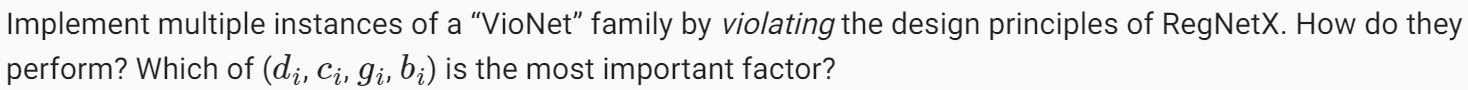

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class VioNetBlock(nn.Module):
    def __init__(self, num_channels, kernel_size=3, use_1x1conv=False, strides=1, skip_connections=True):
        super().__init__()
        self.conv1 = nn.Conv2d(num_channels, num_channels, kernel_size=kernel_size, stride=strides, padding=kernel_size//2)
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size=kernel_size, stride=1, padding=kernel_size//2)
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.skip_connections = skip_connections
        if use_1x1conv:
            self.conv1x1 = nn.Conv2d(num_channels, num_channels, kernel_size=1, stride=strides)
        else:
            self.conv1x1 = None

    def forward(self, x):
        residual = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))

        if self.skip_connections and self.conv1x1:
            residual = self.conv1x1(x)

        if self.skip_connections:
            return F.relu(out + residual)
        else:
            return F.relu(out)

class VioNet(nn.Module):
    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super(VioNet, self).__init__()
        self.net = nn.Sequential(self.stem(stem_channels))
        prev_channels = stem_channels
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(s[0], s[1], s[2], prev_channels))
            prev_channels = s[1]
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.Linear(prev_channels, num_classes)))
        self.init_weights()

    def stem(self, num_channels):
        return nn.Sequential(
            nn.Conv2d(3, num_channels, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(num_channels), nn.ReLU())

    def stage(self, depth, num_channels, kernel_size, prev_channels):
        blk = []
        if num_channels != prev_channels:
            blk.append(nn.Conv2d(prev_channels, num_channels, kernel_size=1))
        for i in range(depth):
            blk.append(VioNetBlock(num_channels, kernel_size=kernel_size, use_1x1conv=(i == 0)))
        return nn.Sequential(*blk)

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.net(x)

# Desain beberapa model VioNet dengan pelanggaran yang berbeda
# (depth, num_channels, kernel_size) per stage
vioNet1 = VioNet([(4, 32, 3), (2, 64, 5), (6, 128, 1), (2, 256, 3)], stem_channels=16)
vioNet2 = VioNet([(3, 32, 1), (4, 80, 3), (5, 160, 5), (3, 320, 3)], stem_channels=32)

# Cek model
summary(vioNet1, (3, 224, 224))
summary(vioNet2, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             448
       BatchNorm2d-2         [-1, 16, 112, 112]              32
              ReLU-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             544
            Conv2d-5         [-1, 32, 112, 112]           9,248
       BatchNorm2d-6         [-1, 32, 112, 112]              64
            Conv2d-7         [-1, 32, 112, 112]           9,248
       BatchNorm2d-8         [-1, 32, 112, 112]              64
            Conv2d-9         [-1, 32, 112, 112]           1,056
      VioNetBlock-10         [-1, 32, 112, 112]               0
           Conv2d-11         [-1, 32, 112, 112]           9,248
      BatchNorm2d-12         [-1, 32, 112, 112]              64
           Conv2d-13         [-1, 32, 112, 112]           9,248
      BatchNorm2d-14         [-1, 32, 1

4. Your goal is to design the “perfect” MLP. Can you use the design principles introduced above to find good architectures? Is it possible to extrapolate from small to large networks?

In [29]:
# 1. Mulai dengan arsitektur dasar:

import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 2. Tambahkan kedalaman dan regularization:

class DeepMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, depth):
        super(DeepMLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        for _ in range(depth):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
            self.layers.append(nn.Dropout(p=0.5))  # Regularization
        self.layers.append(nn.Linear(hidden_size, num_classes))

    def forward(self, x):
        for layer in self.layers:
            x = F.relu(layer(x))
        return x

# 3. Eksperimen dengan skip connections:

class SkipMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, depth):
        super(SkipMLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        for _ in range(depth):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
        self.layers.append(nn.Linear(hidden_size, num_classes))

    def forward(self, x):
        skip = x
        for layer in self.layers:
            x = F.relu(layer(x))
        return x + skip  # Skip connection

Mengekstrapolasi dari network kecil ke network yang lebih besar tidak hanya memungkinkan, tetapi juga merupakan strategi praktis dalam deep learning. Dengan memanfaatkan wawasan yang diperoleh dari model yang lebih kecil, seseorang dapat merancang arsitektur yang lebih besar yang mempertahankan kekuatan dari rekan-rekan mereka yang lebih kecil sambil meningkatkan kapasitas dan performa pada tugas yang kompleks.

Namun, pertimbangan yang cermat terhadap hyperparameter, strategi pelatihan, dan ketersediaan data sangat penting untuk keberhasilan penskalaan.